# Statistics of subjects' state

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
#plt.rcParams['font.sans-serif']=['Noto Sans CJK HK']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    # 用来正常显示负号

## Subject recruit

- Number of children enrolled
- Number of subjects who passed the initial screening
    - Number of subjects exited
    - Number of subjects who have been trained
    - Number of subjects who are completed experiment.
    - Number of subjects waiting to training

In [ ]:
# load subject pool
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    sub_pool1 = pd.read_excel(r'/mnt/workdir/DCM/docs/被试招募及训练/认知图谱-被试库.xlsx',sheet_name='2021-儿童',engine="openpyxl")[['姓名','年龄','状态']].dropna(subset=['年龄'])
    sub_pool2 = pd.read_excel(r'/mnt/workdir/DCM/docs/被试招募及训练/认知图谱-被试库.xlsx',sheet_name='2022-儿童',engine="openpyxl")[['姓名','年龄','状态']].dropna(subset=['年龄'])
sub_pool = pd.concat((sub_pool1,sub_pool2),axis=0)

with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    participants = pd.read_csv(r'/mnt/workdir/DCM/BIDS/participants.tsv',sep='\t')[['Name','Age','usable']].dropna(subset=['Age'])
participants_age = participants.query('(Age<=18)and(usable==1)')['Age'].values

In [ ]:
# Number of subjects enrolled across different ages
fig,ax = plt.subplots(4,1,figsize=(7,28))
sub_age = sub_pool['年龄'].values
ax[0].hist(sub_age)
ax[0].set_title("Number of subjects enrolled",size=16)

# Number of subjects who have been trained across different ages
sub_age = sub_pool.query("(状态=='已完成')or(状态=='训练中')")['年龄'].values
ax[1].hist(sub_age)
ax[1].set_title("Number of subjects who have been trained",size=16)

# Number of subjects who are completed experiment.
print("Number of subjects who are completed experiment:",len(participants_age))
ax[2].hist(participants_age)
ax[2].set_ylim((0,20))
ax[2].set_title("Number of subjects who have completed experiment.",size=16)

# Number of subjects waiting to train
sub_age = sub_pool.query("(状态=='未训练')")['年龄'].values
ax[3].hist(sub_age)
ax[3].set_ylim((0,20))
ax[3].set_title("Number of subjects waiting to train",size=16)

In [ ]:
sub_state = sub_pool['状态'].value_counts()
print(sub_state)
fig,ax = plt.subplots()
plt.pie(sub_state,labels=sub_state.index,autopct='%1.1f%%')

## 各年龄段可用被试数据

Participants: 163


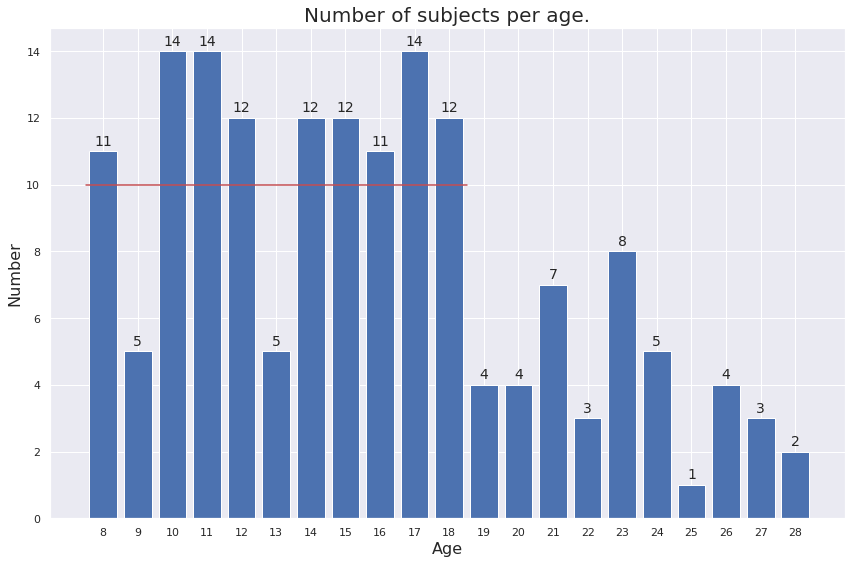

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

participants_file = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(participants_file,sep='\t')
data = data[data['game1_behavior']==1]
print("Participants:", len(data))

# extract subject's number in each group
ages = []
nums = []
for subs in data.groupby('Age'):
    ages.append(subs[0])
    nums.append(len(subs[1]))

# plot bar chart of subject's number with labels
fig,ax = plt.subplots(figsize=(12,8))
ax.plot([7.5,18.5],[10,10],color='r')
#ax.plot([18.5,28.5],[4,4],color='r')
rects = ax.bar(ages,nums,color='b')

# add some text for labels, title and custom x-axis tick labels, etc
ax.set_xlabel("Age",size=16)
ax.set_ylabel("Number",size=16)
ax.set_xticks(range(8,29))
ax.set_title("Number of subjects per age.",size=20)
ax.bar_label(rects,padding=3,size=14)

fig.tight_layout()
plt.savefig('/mnt/workdir/DCM/result/subjects_count.png')
plt.show()